## Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)

## Load Processed Data

In [2]:
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/processed/y_test.csv").values.ravel()

## Logistic Regression

In [3]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

## Logistic Regression Metrics

In [5]:
print("Logistic Regression Metrics")
print("Accuracy:", (accuracy_score(y_test, y_pred_lr) * 100), "%")
print("Precision:", (precision_score(y_test, y_pred_lr) * 100), "%")
print("Recall:", (recall_score(y_test, y_pred_lr) * 100), "%")
print("F1-score:", (f1_score(y_test, y_pred_lr) * 100), "%")
print("ROC-AUC:", (roc_auc_score(y_test, y_prob_lr) * 100), "%")

Logistic Regression Metrics
Accuracy: 80.73916133617625 %
Precision: 66.55948553054662 %
Recall: 55.3475935828877 %
F1-score: 60.43795620437956 %
ROC-AUC: 85.15874536032841 %


## Confusion Matrix (Logistic Regression)

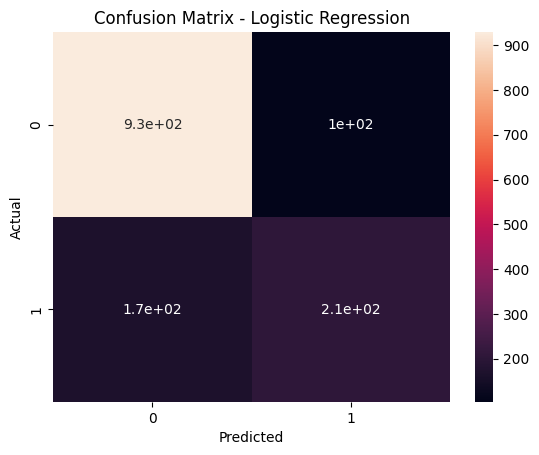

In [8]:
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ROC Curve (Logistic Regression)

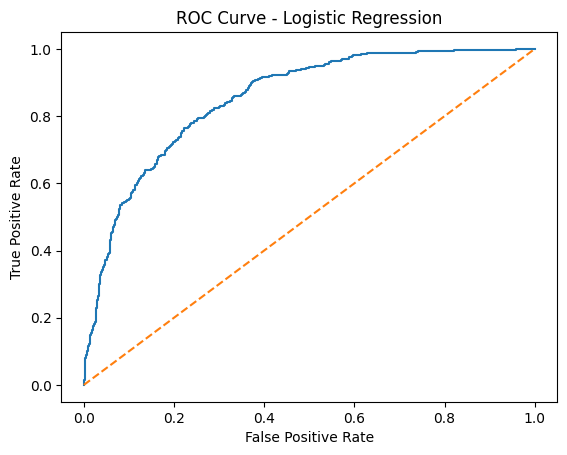

In [9]:
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Train Random Forest

In [10]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

## Random Forest Metrics

In [12]:
print("Random Forest Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_rf) * 100, "%")
print("Precision:", precision_score(y_test, y_pred_rf) * 100, "%")
print("Recall:", recall_score(y_test, y_pred_rf) * 100, "%")
print("F1-score:", f1_score(y_test, y_pred_rf) * 100, "%")
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf) * 100, "%")

Random Forest Metrics
Accuracy: 79.81520966595593 %
Precision: 66.7910447761194 %
Recall: 47.860962566844925 %
F1-score: 55.7632398753894 %
ROC-AUC: 82.92186715397237 %


## Confusion Matrix (Random Forest)

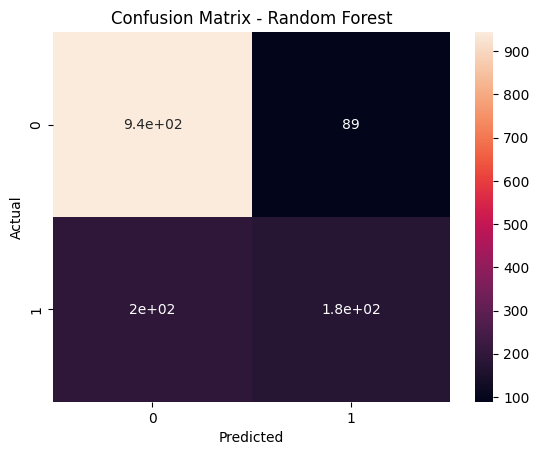

In [14]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ROC Curve Comparison

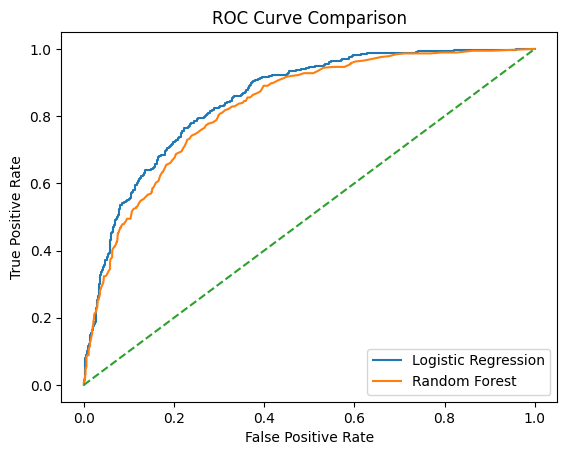

In [15]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Feature Importance (Random Forest)

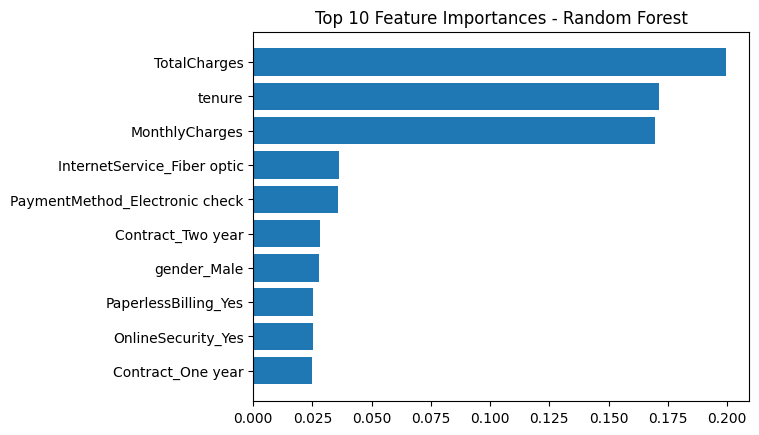

In [16]:
importances = rf.feature_importances_
features = X_train.columns

indices = np.argsort(importances)[-10:]

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices])
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()

## Modeling Insights

- Random Forest outperforms Logistic Regression in ROC-AUC and recall
- Tenure, contract type, and monthly charges are among the most important predictors
- Logistic Regression remains useful due to its interpretability
- Model evaluation focused on recall to better capture churn-prone customers